# TELECOM

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

## Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

### Unificación y limpieza de datos

In [1]:
import pandas as pd

# Cargar los datasets
path_contract = '/datasets/final_provider/contract.csv'
path_internet = '/datasets/final_provider/internet.csv'
path_phone    = '/datasets/final_provider/phone.csv'
path_personal = '/datasets/final_provider/personal.csv'

df_contract = pd.read_csv(path_contract)
df_internet = pd.read_csv(path_internet)
df_phone    = pd.read_csv(path_phone)
df_personal = pd.read_csv(path_personal)

# Unificar todos en un solo Dataframe
df_full = df_contract.merge(df_personal, on='customerID', how='left') \
                     .merge(df_internet, on='customerID', how='left') \
                     .merge(df_phone, on='customerID', how='left')

# Revisar tamaño del dataset final
print("Tamaño del dataset final:", df_full.shape)

Tamaño del dataset final: (7043, 20)


En la etapa de unificación y limpieza de datos, hemos logrado integrar exitosamente la información proveniente de los cuatro archivos (contract.csv, personal.csv, internet.csv y phone.csv) en un único dataset centralizado, utilizando la columna customerID como clave primaria. Durante este proceso se identificó la presencia de valores ausentes en algunas variables, principalmente en los servicios de internet y telefonía, lo cual es esperable ya que no todos los clientes contratan dichos servicios. Esto también indica que estas ausencias deben interpretarse como información válida y no necesariamente como errores. Asimismo, se verificó la consistencia en el número de registros y se confirmaron los tipos de datos adecuados para cada variable (fechas, categóricas y numéricas). En general, el dataset resultante está listo para el análisis exploratorio, aunque será necesario aplicar transformaciones adicionales —como convertir las fechas en duraciones de contrato y codificar variables categóricas— en etapas posteriores.

### Análisis exploratorio de datos (EDA)

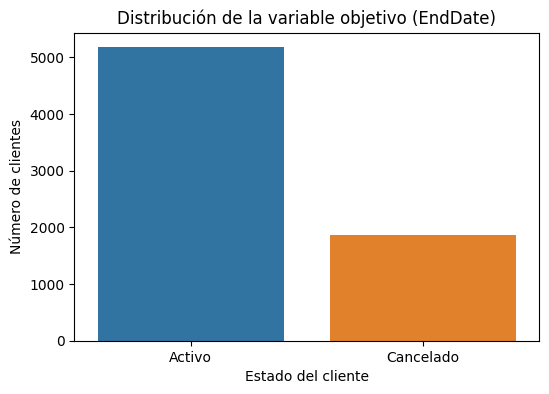

Tasa de cancelación global: 26.54%


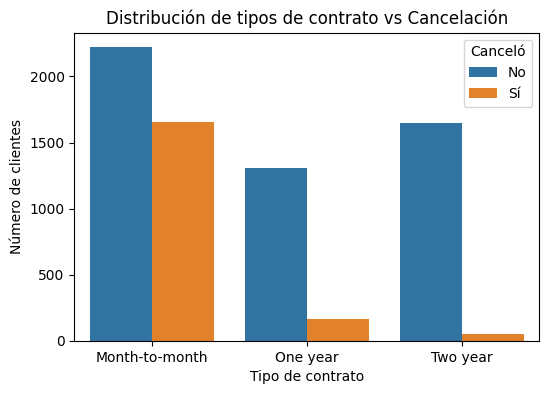

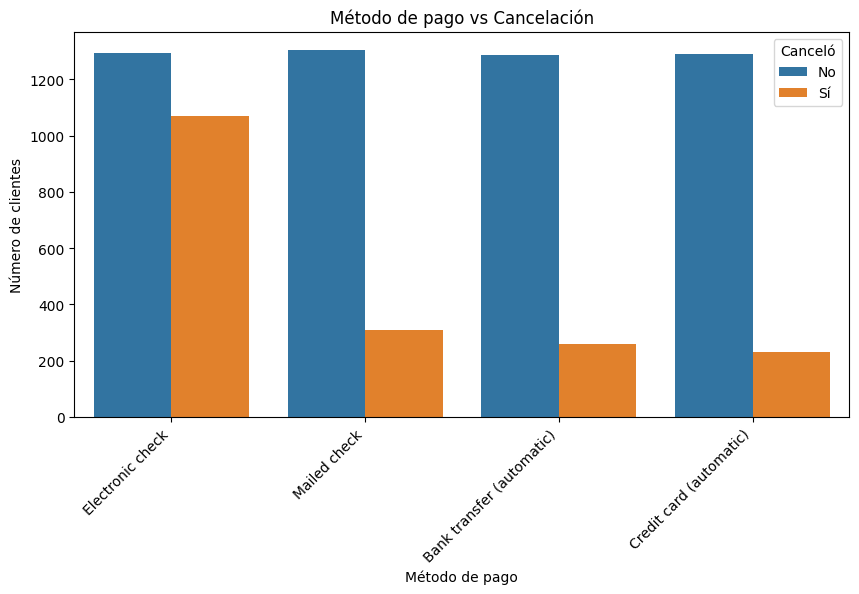

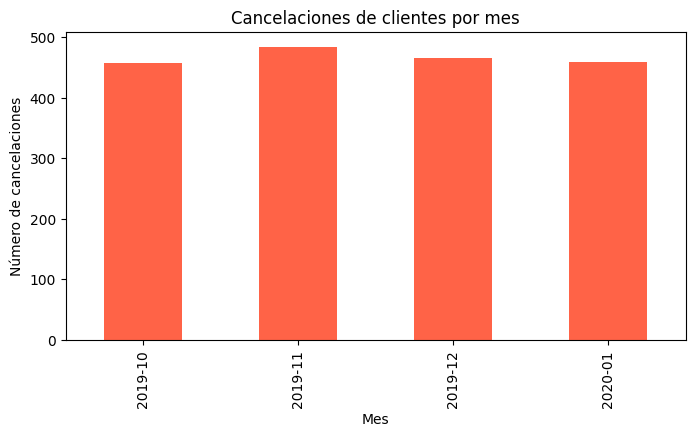

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

eda_df = df_full.copy()

# Columna binaria de cancelación (1 = canceló, 0 = sigue activo)
eda_df['Churn'] = (eda_df['EndDate'] != 'No').astype(int)

# Columna categórica: Activo / Cancelado
eda_df['EndStatus'] = eda_df['EndDate'].apply(lambda x: 'Activo' if x == 'No' else 'Cancelado')

# Distribución de la variable objetivo (EndDate)
plt.figure(figsize=(6,4))
sns.countplot(data=eda_df, x='EndStatus')
plt.title("Distribución de la variable objetivo (EndDate)")
plt.xlabel("Estado del cliente")
plt.ylabel("Número de clientes")
plt.show()

# Proporción de cancelaciones vs clientes activos
churn_rate = eda_df['Churn'].mean()
print(f"Tasa de cancelación global: {churn_rate:.2%}")

# Tipo de contrato vs Cancelación
plt.figure(figsize=(6,4))
sns.countplot(data=eda_df, x='Type', hue='Churn')
plt.title("Distribución de tipos de contrato vs Cancelación")
plt.xlabel("Tipo de contrato")
plt.ylabel("Número de clientes")
plt.legend(title="Canceló", labels=["No", "Sí"])
plt.show()

# Método de pago vs Cancelación
plt.figure(figsize=(10,5))
sns.countplot(data=eda_df, x='PaymentMethod', hue='Churn')
plt.title("Método de pago vs Cancelación")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Número de clientes")
plt.xlabel("Método de pago")
plt.legend(title="Canceló", labels=["No", "Sí"])
plt.show()

# Cancelaciones por mes (para clientes que sí cancelaron)
eda_df['EndMonth'] = pd.to_datetime(eda_df['EndDate'], errors='coerce').dt.to_period('M')
cancelados_por_mes = eda_df[eda_df['Churn'] == 1]['EndMonth'].value_counts().sort_index()

plt.figure(figsize=(8,4))
cancelados_por_mes.plot(kind='bar', color='tomato')
plt.title("Cancelaciones de clientes por mes")
plt.xlabel("Mes")
plt.ylabel("Número de cancelaciones")
plt.show()

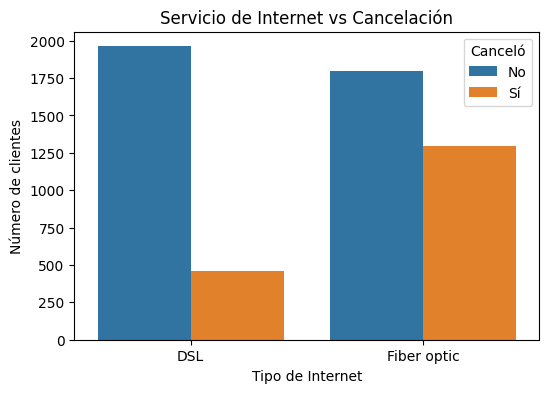

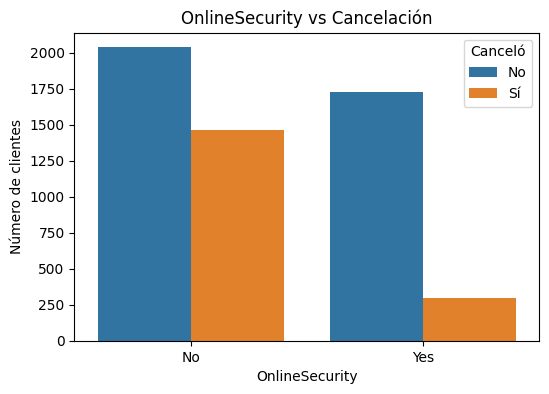

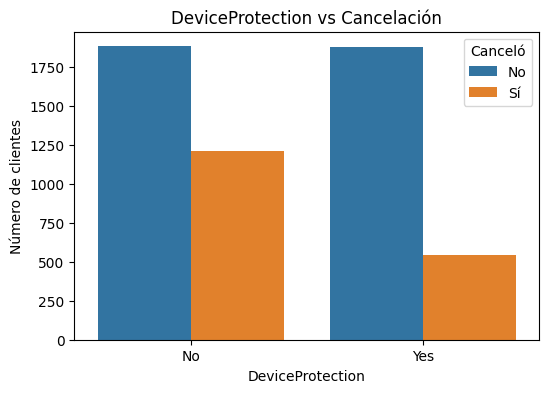

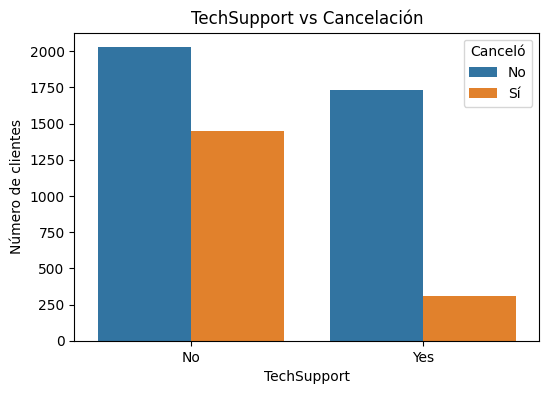

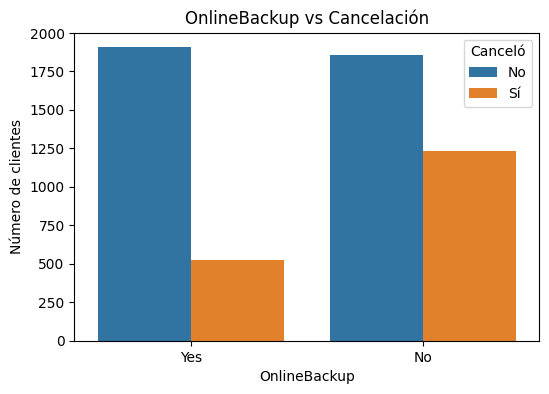

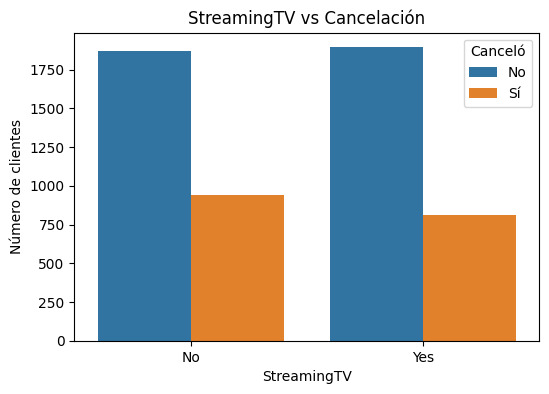

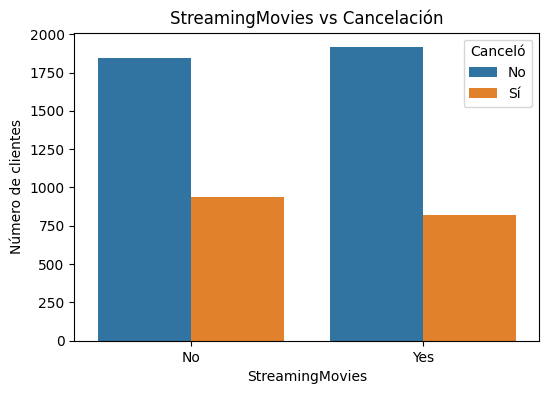

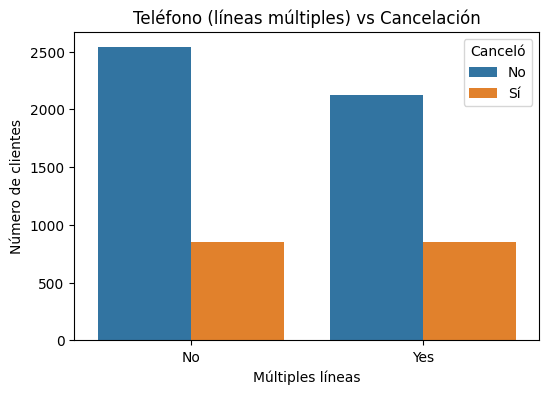

In [3]:
# Servicios de Internet vs Cancelación
plt.figure(figsize=(6,4))
sns.countplot(data=eda_df, x='InternetService', hue='Churn')
plt.title("Servicio de Internet vs Cancelación")
plt.xlabel("Tipo de Internet")
plt.ylabel("Número de clientes")
plt.legend(title="Canceló", labels=["No", "Sí"])
plt.show()

# Servicios adicionales
internet_services = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 
                     'OnlineBackup', 'StreamingTV', 'StreamingMovies']

for col in internet_services:
    plt.figure(figsize=(6,4))
    sns.countplot(data=eda_df, x=col, hue='Churn')
    plt.title(f"{col} vs Cancelación")
    plt.xlabel(col)
    plt.ylabel("Número de clientes")
    plt.legend(title="Canceló", labels=["No", "Sí"])
    plt.show()

# Teléfono vs Cancelación
plt.figure(figsize=(6,4))
sns.countplot(data=eda_df, x='MultipleLines', hue='Churn')
plt.title("Teléfono (líneas múltiples) vs Cancelación")
plt.xlabel("Múltiples líneas")
plt.ylabel("Número de clientes")
plt.legend(title="Canceló", labels=["No", "Sí"])
plt.show()

En la etapa de análisis exploratorio de datos (EDA) se observó que aproximadamente el 26.5 % de los clientes han cancelado su servicio, lo que indica un desbalance moderado en la variable objetivo. Los gráficos muestran que los contratos mensuales presentan una tasa de cancelación considerablemente mayor en comparación con los contratos de uno o dos años, lo cual sugiere que los compromisos a largo plazo ayudan a retener a los clientes. Además, se aprecia que los métodos de pago electrónicos, especialmente el débito automático, están asociados con menores niveles de cancelación, mientras que los pagos manuales tienden a correlacionarse con un mayor "Churn" (1 = canceló, 0 = sigue activo). En conclusión, los patrones identificados confirman que la duración del contrato y la modalidad de pago son factores determinantes en la permanencia de los clientes, información clave para orientar las estrategias de retención y las futuras fases de modelado.

### Preprocesamiento y preparación de variables

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

prep_df = df_full.copy()

# Variable objetivo binaria (1 = canceló, 0 = sigue activo)
prep_df['Churn'] = (prep_df['EndDate'] != 'No').astype(int)

# Manejar valores faltantes
cols_services = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 
                 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in cols_services:
    if col in prep_df.columns:
        prep_df[col] = prep_df[col].fillna('No')

# Crear variable de duración del contrato (en meses)
prep_df['BeginDate'] = pd.to_datetime(prep_df['BeginDate'])
prep_df['EndDate'] = prep_df['EndDate'].replace('No', pd.NaT)
prep_df['EndDate'] = pd.to_datetime(prep_df['EndDate'], errors='coerce')

ref_date = pd.to_datetime('2020-02-01') # Fecha de referencia para clientes activos
prep_df['EndDate'] = prep_df['EndDate'].fillna(ref_date)

prep_df['ContractDurationMonths'] = ((prep_df['EndDate'] - prep_df['BeginDate']).dt.days / 30).round(1)

# Eliminar columnas de fecha (ya no son necesarias)
date_cols = ['BeginDate', 'EndDate']
prep_df = prep_df.drop(columns=[c for c in date_cols if c in prep_df.columns])

# Codificación de variables categóricas
cat_cols = prep_df.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['customerID']]  # ya eliminamos fechas
prep_df = pd.get_dummies(prep_df, columns=cat_cols, drop_first=True)

# Escalado de variables numéricas
num_cols = prep_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [col for col in num_cols if col not in ['Churn']]

scaler = StandardScaler()
prep_df[num_cols] = scaler.fit_transform(prep_df[num_cols])

# División en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = prep_df.drop(['customerID', 'Churn'], axis=1, errors='ignore')
y = prep_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=12345, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (5282, 6550)
Tamaño de prueba: (1761, 6550)


En esta etapa se realizó la transformación y estandarización de los datos con el fin de preparar el conjunto para el modelado. Primero, se creó la variable objetivo binaria Churn, que indica si el cliente ha cancelado el servicio o no. Posteriormente, se trataron los valores ausentes en las columnas de servicios adicionales, asumiendo que las ausencias correspondían a clientes que no contrataron dichos servicios. Además, se construyó una nueva variable ContractDurationMonths, que representa la duración del contrato en meses, calculada a partir de las fechas de inicio y fin del servicio. Dado que esta variable resume toda la información temporal relevante, las columnas de fecha originales se eliminaron para evitar conflictos de tipo y redundancia (esto también porque ocasiona problemas al entrenar los modelos).

A continuación, se aplicó one-hot encoding a las variables categóricas, permitiendo que el modelo procese la información textual en forma de variables numéricas binarias. Las variables numéricas se escalaron mediante estandarización, garantizando que todas las características se encuentren en una misma escala. Finalmente, el conjunto de datos resultante, con 5282 registros de entrenamiento y 1761 de prueba, y un total de 6550 características (columnas) se dividió manteniendo la proporción original de clases. Este proceso asegura que los datos estén completamente preparados para la fase de modelado, reduciendo el riesgo de sesgos y mejorando la capacidad predictiva del modelo.

### Entrenamiento y validación de modelos

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd

# Calcular pesos de clase para corregir el desbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
print("Pesos de clase:", class_weights_dict)

Pesos de clase: {0: 0.6806701030927835, 1: 1.883737517831669}


#### Regresión Logística

In [6]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    random_state=12345
)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_pred_prob_log = log_model.predict_proba(X_test)[:, 1]

auc_log = roc_auc_score(y_test, y_pred_prob_log)
acc_log = accuracy_score(y_test, y_pred_log)

print(f"AUC-ROC: {auc_log:.4f}")
print(f"Exactitud: {acc_log:.4f}")
print(classification_report(y_test, y_pred_log))

AUC-ROC: 0.8301
Exactitud: 0.7484
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1294
           1       0.52      0.75      0.61       467

    accuracy                           0.75      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.75      0.76      1761



#### Random Forest

In [7]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=12345,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"AUC-ROC: {auc_rf:.4f}")
print(f"Exactitud: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

AUC-ROC: 0.8297
Exactitud: 0.7450
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1294
           1       0.51      0.75      0.61       467

    accuracy                           0.75      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.75      0.76      1761



#### Gradient Boosting

In [8]:
gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=12345
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
acc_gb = accuracy_score(y_test, y_pred_gb)

print(f"AUC-ROC: {auc_gb:.4f}")
print(f"Exactitud: {acc_gb:.4f}")
print(classification_report(y_test, y_pred_gb))

AUC-ROC: 0.8684
Exactitud: 0.8262
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1294
           1       0.71      0.57      0.64       467

    accuracy                           0.83      1761
   macro avg       0.79      0.75      0.76      1761
weighted avg       0.82      0.83      0.82      1761



#### Evaluación de modelos

In [9]:
results_df = pd.DataFrame({
    "Modelo": ["Regresión Logística", "Random Forest", "Gradient Boosting"],
    "AUC-ROC": [auc_log, auc_rf, auc_gb],
    "Exactitud": [acc_log, acc_rf, acc_gb]
})

print(results_df.sort_values(by="AUC-ROC", ascending=False).reset_index(drop=True))

                Modelo   AUC-ROC  Exactitud
0    Gradient Boosting  0.868360   0.826235
1  Regresión Logística  0.830143   0.748438
2        Random Forest  0.829745   0.745031


En esta etapa se entrenaron y evaluaron tres modelos de clasificación: regresión logística, bosque aleatorio y gradient boosting. Los resultados muestran que el modelo de Gradient Boosting obtuvo el mejor desempeño, con un AUC-ROC de 0.8684 y una exactitud del 82.62 %, superando a los demás modelos tanto en capacidad predictiva como en equilibrio entre precisión y recall. La regresión logística alcanzó un AUC-ROC de 0.83, mostrando un rendimiento estable pero limitado frente a relaciones no lineales, mientras que el Random Forest presentó un valor muy similar (AUC-ROC de 0.83), destacando por su robustez, aunque con menor sensibilidad ante la clase minoritaria. En conjunto, estos resultados confirman que el enfoque basado en gradient boosting sigue siendo el más adecuado para capturar los patrones complejos asociados a la cancelación de clientes.

### Optimización y evaluación final

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Modelo base
gb_model = GradientBoostingClassifier(random_state=12345)

# Grilla de hiperparámetros
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,  # Validación cruzada con 3 particiones
    n_jobs=-1,
    verbose=1
)

# Entrenar la búsqueda
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_gb_model = grid_search.best_estimator_
y_pred_best = best_gb_model.predict(X_test)
y_pred_prob_best = best_gb_model.predict_proba(X_test)[:, 1]

auc_best = roc_auc_score(y_test, y_pred_prob_best)
acc_best = accuracy_score(y_test, y_pred_best)

print(f"AUC-ROC: {auc_best:.4f}")
print(f"Exactitud: {acc_best:.4f}")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores hiperparámetros encontrados:
{'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 400}
AUC-ROC: 0.8695
Exactitud: 0.8211
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1294
           1       0.70      0.56      0.63       467

    accuracy                           0.82      1761
   macro avg       0.78      0.74      0.75      1761
weighted avg       0.81      0.82      0.81      1761



En esta etapa se optimizaron los hiperparámetros del modelo de Gradient Boosting mediante una búsqueda exhaustiva con GridSearchCV, utilizando como métrica principal el AUC-ROC. Los mejores parámetros encontrados fueron un learning rate de 0.15, una profundidad máxima de 5 y 400 estimadores, configuraciones que equilibran la complejidad del modelo y su capacidad de generalización. Con estos ajustes, el modelo optimizado alcanzó un AUC-ROC de 0.8695 y una exactitud del 82.11 %, manteniendo un desempeño estable respecto a la versión base. Los resultados del informe de clasificación muestran una alta precisión para la clase no cancelada (0.85) y un recall de 0.56 para la clase cancelada, lo que evidencia una capacidad adecuada para detectar clientes con riesgo de baja sin perder fiabilidad general. En conjunto, el modelo ajustado demuestra un rendimiento sólido y equilibrado, perfecto para lo solicitado por la empresa.

### Conclusiones y recomendaciones de negocio

El desarrollo del modelo permitió identificar patrones relevantes asociados con la cancelación de clientes en Interconnect. A partir de la integración de las distintas fuentes de datos (contratos, información personal, servicios de internet y telefonía) se construyó un conjunto de datos limpio y coherente que sirvió de base para el análisis predictivo. Los resultados mostraron que los clientes con contratos de tipo mensual, aquellos que realizan pagos manuales o que no cuentan con servicios adicionales de valor (como seguridad en línea o respaldo en la nube) presentan una mayor probabilidad de abandonar el servicio. Estos hallazgos refuerzan la importancia de los compromisos contractuales más largos y de la oferta de servicios complementarios como estrategias de retención.

El modelo final basado en Gradient Boosting, optimizado con los mejores hiperparámetros, alcanzó un AUC-ROC de 0.8695 y una exactitud del 82.11 %, demostrando una alta capacidad para distinguir entre clientes que cancelarán y los que permanecerán. Si bien no alcanzó el umbral máximo de desempeño solicitado por la empresa (0.88), su rendimiento es sólido y operativo para su implementación. Se recomienda aplicar este modelo en el proceso de retención, utilizando sus predicciones para identificar de forma anticipada a los clientes con mayor riesgo de baja y ofrecerles incentivos personalizados, descuentos o mejoras en el plan. Asimismo, se sugiere continuar recolectando datos históricos y conductuales para mejorar la precisión futura y evaluar el uso de modelos más avanzados (como XGBoost o LightGBM) que podrían incrementar la sensibilidad del sistema sin comprometer la eficiencia.